# Notebook for reading in snapshot cluster data for Paper 1 plots.

Why are these snapshots important? I want to have a characteristic time to compare all 4 run's clusters.

Keep in mind that this analysis may reveal some single number metric that could describe all runs and may be useful to return to a time series analysis!

Why am I using python2.7? - Torch cluster data is generated and saved using python2.7 (specifically, the cluster onject exists in a script that depends on a python2.7 compatible version of yt).


In [439]:
import yt
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from amuse.lab import units as u

In [132]:
from scipy.integrate import quad
# Define two parts of IMF
def low_imf(x):
    return x ** (-1.3)
def high_imf(x):
    return 0.5 * x ** (-2.3)
def low_int(x):
    return x ** (-0.3)
def high_int(x):
    return 0.5 * x ** (-1.3)
def normalize_kroupa(input_masses):
    masses_all = input_masses
    masses_imf = input_masses
    # Normalization for Kroupa IMF and total mass
    norm_kroupa = quad(low_int, 0.08, 0.5)[0] + quad(high_int, 0.5, 150)[0]
    total_mass = np.sum(masses_all)
    C = total_mass / norm_kroupa

    # IMF for star froms IMF
    # Value of KS test highly dependent on number of bins
    bins_imf   = np.logspace(np.log10(0.08), np.log10(150), 11)
    counts_imf = np.histogram(masses_imf, bins_imf)[0]
    x_imf      = []
    imf_imf    = []
    for i in range(len(bins_imf) - 1):
        x_imf.append(10 ** ((np.log10(bins_imf[i]) + np.log10(bins_imf[i+1])) / 2))
        imf_imf.append(C * np.min([quad(low_imf, bins_imf[i], bins_imf[i+1])[0], \
                                               quad(high_imf, bins_imf[i], bins_imf[i+1])[0]]))
    return x_imf, imf_imf, bins_imf, counts_imf


In [440]:
Lv_2tff_dbscan     = pickle.load(open("./L3-v/2tff_dbscan_clusters.pickle", "rb"))
Lv_2tff_all_stars  = pickle.load(open("./L3-v/2tff_all_stars.pickle", "rb"))
#Lv_2tff_amuse
Lv_20gas_dbscan    = pickle.load(open("./L3-v/20gas_dbscan_clusters.pickle", "rb"))
Lv_20gas_all_stars = pickle.load(open("./L3-v/20gas_all_stars.pickle", "rb"))
#Lv_20gas_amuse

L50_2tff_dbscan     = pickle.load(open("./L3-50M/2tff_dbscan_clusters.pickle", "rb"))
L50_2tff_all_stars  = pickle.load(open("./L3-50M/2tff_all_stars.pickle", "rb"))
#L50_2tff_amuse
L50_20gas_dbscan    = pickle.load(open("./L3-50M/20gas_dbscan_clusters.pickle", "rb"))
L50_20gas_all_stars = pickle.load(open("./L3-50M/20gas_all_stars.pickle", "rb"))
#L50_20gas_amuse

L70_2tff_dbscan     = pickle.load(open("./L3-70M/2tff_dbscan_clusters.pickle", "rb"))
L70_2tff_all_stars  = pickle.load(open("./L3-70M/2tff_all_stars.pickle", "rb"))
#L70_2tff_amuse
L70_20gas_dbscan    = pickle.load(open("./L3-70M/20gas_dbscan_clusters.pickle", "rb"))
L70_20gas_all_stars = pickle.load(open("./L3-70M/20gas_all_stars.pickle", "rb"))
#L70_20gas_amuse

L100_2tff_dbscan     = pickle.load(open("./L3-100M/2tff_dbscan_clusters.pickle", "rb"))
L100_2tff_all_stars  = pickle.load(open("./L3-100M/2tff_all_stars.pickle", "rb"))
#L100_2tff_amuse
L100_20gas_dbscan    = pickle.load(open("./L3-100M/20gas_dbscan_clusters.pickle", "rb"))
L100_20gas_all_stars = pickle.load(open("./L3-100M/20gas_all_stars.pickle", "rb"))
#L100_20gas_amuse

In [8]:
print dir(Lv_2tff_all_stars)
print dir(Lv_2tff_dbscan)
print L50_20gas_dbscan.n_groups

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cluster_boundedness', 'groups', 'grp_KE', 'grp_TE', 'grp_TM', 'grp_com', 'grp_comv', 'grp_gPE', 'grp_gas_EI', 'grp_gas_KE', 'grp_gas_ME', 'grp_gas_TE', 'grp_gas_TM', 'grp_gas_comv', 'grp_gas_gPE', 'grp_gas_sPE', 'grp_mass_dense_gas', 'grp_mass_jeans_gas', 'grp_radius', 'grp_sPE', 'half_mass_radii', 'lagrangian_radii', 'n_groups', 'sim_time', 'stars', 'total_mass_dense_gas', 'total_mass_gas', 'total_mass_jeans_gas']
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cluster_boundedness', 'groups', 'grp_KE', 'grp_TE', 'grp_TM', 'grp_com', 

In [83]:
print L50_20gas_dbscan.groups[0].mass.sum().value_in(u.MSun)
#arr = np.array(L)
#arr[arr.cumsum() <= 20].tolist()
#[1, 2, 3, 4, 5]
print L50_20gas_dbscan.groups[0][L50_20gas_dbscan.groups[0].mass.value_in(u.MSun) >=7.0].mass.value_in(u.MSun).sum()


956.677884231
79.9368583278


# Cluter analysis - Cluster mass vs. internal boundness


In [441]:
def extract_cluster_mass_and_eint_from_amuse_list(cluster_list):
    clusters_mass = []
    clusters_eint = []
    clusters_radius = []
    for i, group in enumerate(cluster_list.groups):
        clusters_mass.append(group.mass.sum().value_in(u.MSun))
        clusters_eint.append(cluster_list.grp_TE[i])
        clusters_radius.append(cluster_list.grp_radius[i]*3.241e-19)
    return clusters_mass, clusters_eint, clusters_radius

Lv_2tff_mass, Lv_2tff_eint, Lv_2tff_radius = extract_cluster_mass_and_eint_from_amuse_list(Lv_2tff_dbscan)
Lv_20gas_mass, Lv_20gas_eint, Lv_20gas_radius = extract_cluster_mass_and_eint_from_amuse_list(Lv_20gas_dbscan)

L50_2tff_mass, L50_2tff_eint, L50_2tff_radius = extract_cluster_mass_and_eint_from_amuse_list(L50_2tff_dbscan)
L50_20gas_mass, L50_20gas_eint, L50_20gas_radius = extract_cluster_mass_and_eint_from_amuse_list(L50_20gas_dbscan)

L70_2tff_mass, L70_2tff_eint, L70_2tff_radius = extract_cluster_mass_and_eint_from_amuse_list(L70_2tff_dbscan)
L70_20gas_mass, L70_20gas_eint, L70_20gas_radius = extract_cluster_mass_and_eint_from_amuse_list(L70_20gas_dbscan)

L100_2tff_mass, L100_2tff_eint, L100_2tff_radius = extract_cluster_mass_and_eint_from_amuse_list(L100_2tff_dbscan)
L100_20gas_mass, L100_20gas_eint, L100_20gas_radius = extract_cluster_mass_and_eint_from_amuse_list(L100_20gas_dbscan)

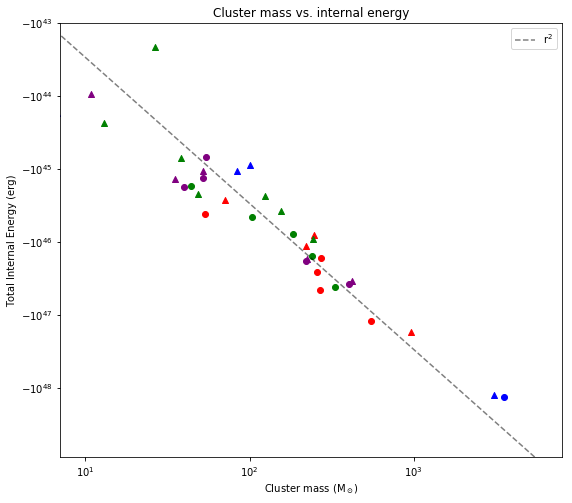

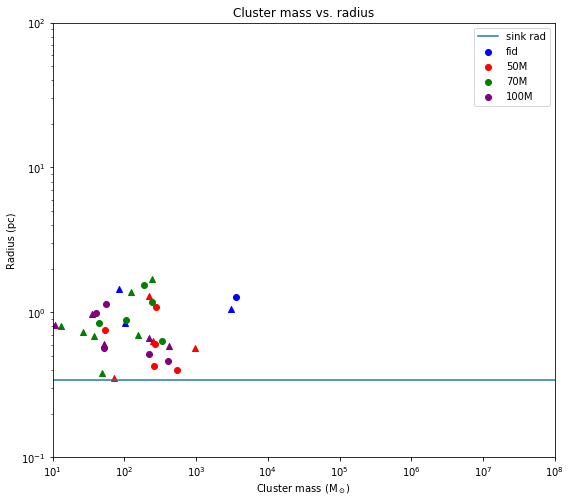

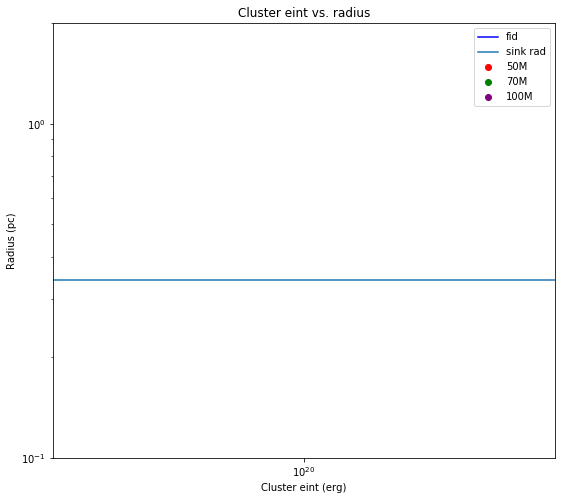

In [451]:
# Slope of **-2
# cluster radius vs. cluster mass
# radius vs. eint
r2x = np.logspace(0,4)
r2y = -1.0*r2x**2 * 3e41

plt.figure(figsize=(9,8))
plt.title('Cluster mass vs. internal energy')
plt.xscale('symlog')
plt.yscale('symlog')

plt.scatter(Lv_2tff_mass, Lv_2tff_eint, c='b')
plt.scatter(Lv_20gas_mass, Lv_20gas_eint, c='b', marker='^')

plt.scatter(L50_2tff_mass, L50_2tff_eint, c='r')
plt.scatter(L50_20gas_mass, L50_20gas_eint, c='r', marker='^')

plt.scatter(L70_2tff_mass, L70_2tff_eint, c='g')
plt.scatter(L70_20gas_mass, L70_20gas_eint, c='g', marker='^')

plt.scatter(L100_2tff_mass, L100_2tff_eint, c='purple')
plt.scatter(L100_20gas_mass, L100_20gas_eint, c='purple', marker='^')

plt.plot(r2x,r2y,linestyle='--',color='k',alpha=0.5,label='r$^2$')
plt.legend()

plt.xlim(7,8000)
plt.ylim(-9e48,-1e43)
plt.xlabel('Cluster mass (M$_\odot$)')
plt.ylabel('Total Internal Energy (erg)')
plt.show()

plt.figure(figsize=(9,8))
plt.title('Cluster mass vs. radius')
plt.xscale('symlog')
plt.yscale('log')

plt.scatter(Lv_2tff_mass, Lv_2tff_radius, c='b', label='fid')
plt.scatter(Lv_20gas_mass, Lv_20gas_radius, c='b', marker='^')

plt.scatter(L50_2tff_mass, L50_2tff_radius, c='r', label='50M')
plt.scatter(L50_20gas_mass, L50_20gas_radius, c='r', marker='^')

plt.scatter(L70_2tff_mass, L70_2tff_radius, c='g', label='70M')
plt.scatter(L70_20gas_mass, L70_20gas_radius, c='g', marker='^')

plt.scatter(L100_2tff_mass, L100_2tff_radius, c='purple', label='100M')
plt.scatter(L100_20gas_mass, L100_20gas_radius, c='purple', marker='^')

plt.xlabel('Cluster mass (M$_\odot$)')
plt.ylabel('Radius (pc)')
plt.ylim(0.1, 100.0)
plt.xlim(10,1e8)
plt.axhline(y=0.3418, label='sink rad')
plt.legend()
plt.show()

plt.figure(figsize=(9,8))
plt.title('Cluster eint vs. radius')
#plt.xscale('symlog')
plt.yscale('symlog')

plt.loglog(Lv_2tff_eint, Lv_2tff_radius, c='b', label='fid')
plt.scatter(Lv_20gas_eint, Lv_20gas_radius, c='b', marker='^')

plt.scatter(L50_2tff_eint, L50_2tff_radius, c='r', label='50M')
plt.scatter(L50_20gas_eint, L50_20gas_radius, c='r', marker='^')

plt.scatter(L70_2tff_eint, L70_2tff_radius, c='g', label='70M')
plt.scatter(L70_20gas_eint, L70_20gas_radius, c='g', marker='^')

plt.scatter(L100_2tff_eint, L100_2tff_radius, c='purple', label='100M')
plt.scatter(L100_20gas_eint, L100_20gas_radius, c='purple', marker='^')

plt.xlabel('Cluster eint (erg)')
plt.ylabel('Radius (pc)')
plt.ylim(0.1, 2.0)
plt.axhline(y=0.3418, label='sink rad')
plt.legend()
plt.show()

In [292]:
def extract_percent_mass_massive_stars(cluster_list, all_stars_list):
    clusters_mass_ms = []
    clusters_mass_perc_ms = []
    perc_mass_ms_in_clusters = []
    total_cluster_ms_mass = 0
    for i, group in enumerate(cluster_list.groups):
        total_cluster_mass = group.mass.value_in(u.MSun).sum()
        ms_mass = group[group.mass.value_in(u.MSun) >=7.0].mass.value_in(u.MSun).sum()
        clusters_mass_ms.append(ms_mass)
        total_cluster_ms_mass += ms_mass
        clusters_mass_perc_ms.append(ms_mass/total_cluster_mass)
    all_star_ms_mass = all_stars_list.groups[0][all_stars_list.groups[0].mass.value_in(u.MSun) >= 7.0].mass.value_in(u.MSun).sum()
    print all_star_ms_mass
    perc_mass_ms_in_clusters.append(total_cluster_ms_mass/all_star_ms_mass)
    return clusters_mass_ms, clusters_mass_perc_ms, perc_mass_ms_in_clusters

def extract_percent_mass_all_stars(cluster_list, all_stars_list):
    clusters_mass_as = []
    clusters_mass_perc_as = []
    perc_mass_as_in_clusters = []
    total_cluster_as_mass = 0
    for i, group in enumerate(cluster_list.groups):
        total_cluster_mass = group.mass.value_in(u.MSun).sum()
        as_mass = group[group.mass.value_in(u.MSun) < 7.0].mass.value_in(u.MSun).sum()
        clusters_mass_as.append(as_mass)
        total_cluster_as_mass += as_mass
        clusters_mass_perc_as.append(as_mass/total_cluster_mass)
    all_star_as_mass = all_stars_list.groups[0][all_stars_list.groups[0].mass.value_in(u.MSun) < 7.0].mass.value_in(u.MSun).sum()
    
    perc_mass_as_in_clusters.append(total_cluster_as_mass/all_star_as_mass)
    return clusters_mass_as, clusters_mass_perc_as, perc_mass_as_in_clusters

Lv_2tff_mass_ms, Lv_2tff_mass_perc_ms, Lv_2tff_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(Lv_2tff_dbscan, Lv_2tff_all_stars)
Lv_20gas_mass_ms, Lv_20gas_mass_perc_ms, Lv_20gas_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(Lv_20gas_dbscan, Lv_20gas_all_stars)

L50_2tff_mass_ms, L50_2tff_mass_perc_ms, L50_2tff_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L50_2tff_dbscan, L50_2tff_all_stars)
L50_20gas_mass_ms, L50_20gas_mass_perc_ms, L50_20gas_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L50_20gas_dbscan, L50_20gas_all_stars)

L70_2tff_mass_ms, L70_2tff_mass_perc_ms, L70_2tff_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L70_2tff_dbscan, L70_2tff_all_stars)
L70_20gas_mass_ms, L70_20gas_mass_perc_ms, L70_20gas_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L70_20gas_dbscan, L70_20gas_all_stars)

L100_2tff_mass_ms, L100_2tff_mass_perc_ms, L100_2tff_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L100_2tff_dbscan, L100_2tff_all_stars)
L100_20gas_mass_ms, L100_20gas_mass_perc_ms, L100_20gas_mass_ms_perc_in_clusters = extract_percent_mass_massive_stars(L100_20gas_dbscan, L100_20gas_all_stars)

661.078314554
591.96288588
403.594957154
357.208917073
265.385596829
213.840646939
238.259239182
236.171034698


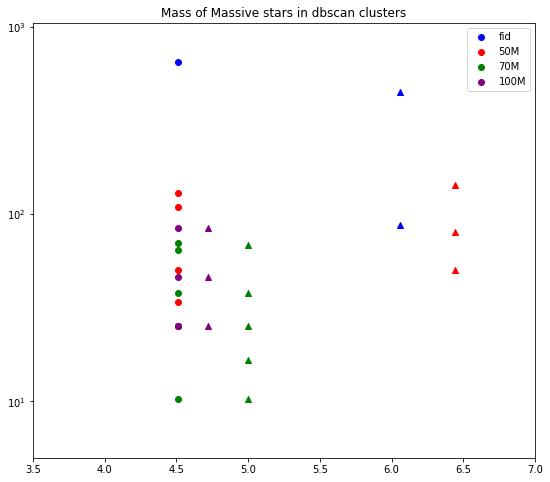

[0.18288399710230976]


In [288]:

plt.figure(figsize=(9,8))
plt.scatter(np.ones(len(Lv_2tff_mass_perc_ms))*4.51,Lv_2tff_mass_ms, c='b', label='fid')
#plt.plot([4.51, 6.06],[sum(Lv_2tff_mass_ms)/len(Lv_2tff_mass_ms), sum(Lv_20gas_mass_ms)/len(Lv_20gas_mass_ms)], c='b')
plt.scatter(np.ones(len(Lv_20gas_mass_perc_ms))*6.06, Lv_20gas_mass_ms, c='b', marker='^')

plt.scatter(np.ones(len(L50_2tff_mass_perc_ms))*4.51,L50_2tff_mass_ms, c='r', label='50M')
plt.scatter(np.ones(len(L50_20gas_mass_perc_ms))*6.44, L50_20gas_mass_ms, c='r', marker='^')
#plt.plot([4.51, 6.44],[sum(L50_2tff_mass_ms)/len(L50_2tff_mass_ms), sum(L50_20gas_mass_ms)/len(L50_20gas_mass_ms)], c='r')

plt.scatter(np.ones(len(L70_2tff_mass_perc_ms))*4.51,L70_2tff_mass_ms, c='g', label='70M')
plt.scatter(np.ones(len(L70_20gas_mass_perc_ms))*5.00, L70_20gas_mass_ms, c='g', marker='^')
#plt.plot([4.51, 5.00],[sum(L70_2tff_mass_ms)/len(L70_2tff_mass_ms), sum(L70_20gas_mass_ms)/len(L70_20gas_mass_ms)], c='g')

plt.scatter(np.ones(len(L100_2tff_mass_perc_ms))*4.51,L100_2tff_mass_ms, c='purple', label='100M')
plt.scatter(np.ones(len(L100_20gas_mass_perc_ms))*4.72, L100_20gas_mass_ms, c='purple', marker='^')
#plt.plot([4.51, 4.72],[sum(L100_2tff_mass_ms)/len(L100_2tff_mass_ms), sum(L100_20gas_mass_ms)/len(L100_20gas_mass_ms)], c='purple')


plt.xlim(3.5,7.0)
plt.ylim(5,1050)
plt.yscale('symlog')
plt.legend()
plt.title('Mass of Massive stars in dbscan clusters')
plt.show()
print Lv_2tff_mass_perc_ms

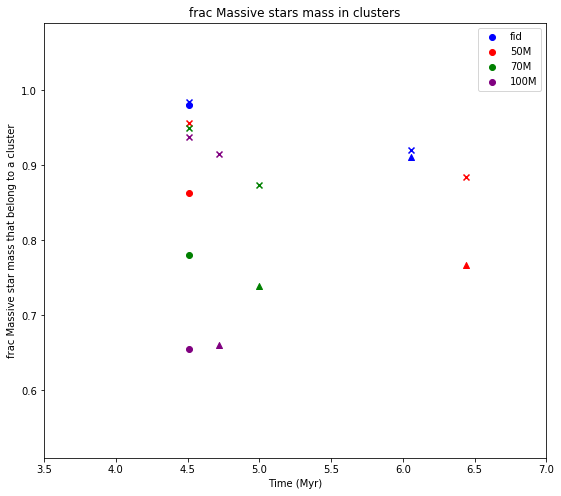

In [290]:
plt.figure(figsize=(9,8))
plt.scatter(4.51,Lv_2tff_mass_ms_perc_in_clusters, c='b', label='fid')
plt.scatter(6.06, Lv_20gas_mass_ms_perc_in_clusters, c='b', marker='^')

plt.scatter(4.51,L50_2tff_mass_ms_perc_in_clusters, c='r', label='50M')
plt.scatter(6.44, L50_20gas_mass_ms_perc_in_clusters, c='r', marker='^')

plt.scatter(4.51,L70_2tff_mass_ms_perc_in_clusters, c='g', label='70M')
plt.scatter(5.00, L70_20gas_mass_ms_perc_in_clusters, c='g', marker='^')

plt.scatter(4.51,L100_2tff_mass_ms_perc_in_clusters, c='purple', label='100M')
plt.scatter(4.72, L100_20gas_mass_ms_perc_in_clusters, c='purple', marker='^')

plt.xlim(3.5,7.0)
plt.ylim(0.51,1.09)
plt.xlabel('Time (Myr)')
plt.ylabel('frac Massive star mass that belong to a cluster')
#plt.yscale('symlog')
plt.legend()
plt.title('frac Massive stars mass in clusters')

Lv_2tff_mass_as, Lv_2tff_mass_perc_as, Lv_2tff_mass_as_perc_in_clusters = extract_percent_mass_all_stars(Lv_2tff_dbscan, Lv_2tff_all_stars)
Lv_20gas_mass_as, Lv_20gas_mass_perc_as, Lv_20gas_mass_as_perc_in_clusters = extract_percent_mass_all_stars(Lv_20gas_dbscan, Lv_20gas_all_stars)

L50_2tff_mass_as, L50_2tff_mass_perc_as, L50_2tff_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L50_2tff_dbscan, L50_2tff_all_stars)
L50_20gas_mass_as, L50_20gas_mass_perc_as, L50_20gas_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L50_20gas_dbscan, L50_20gas_all_stars)

L70_2tff_mass_as, L70_2tff_mass_perc_as, L70_2tff_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L70_2tff_dbscan, L70_2tff_all_stars)
L70_20gas_mass_as, L70_20gas_mass_perc_as, L70_20gas_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L70_20gas_dbscan, L70_20gas_all_stars)

L100_2tff_mass_as, L100_2tff_mass_perc_as, L100_2tff_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L100_2tff_dbscan, L100_2tff_all_stars)
L100_20gas_mass_as, L100_20gas_mass_perc_as, L100_20gas_mass_as_perc_in_clusters = extract_percent_mass_all_stars(L100_20gas_dbscan, L100_20gas_all_stars)

plt.scatter(4.51,Lv_2tff_mass_as_perc_in_clusters, c='b', label='fid',marker='x')
plt.scatter(6.06, Lv_20gas_mass_as_perc_in_clusters, c='b', marker='x')
plt.scatter(4.51,L50_2tff_mass_as_perc_in_clusters, c='r', label='fid',marker='x')
plt.scatter(6.44, L50_20gas_mass_as_perc_in_clusters, c='r', marker='x')
plt.scatter(4.51,L70_2tff_mass_as_perc_in_clusters, c='g', label='fid',marker='x')
plt.scatter(5.00, L70_20gas_mass_as_perc_in_clusters, c='g', marker='x')
plt.scatter(4.51,L100_2tff_mass_as_perc_in_clusters, c='purple', label='fid',marker='x')
plt.scatter(4.72, L100_20gas_mass_as_perc_in_clusters, c='purple', marker='x')
plt.show()



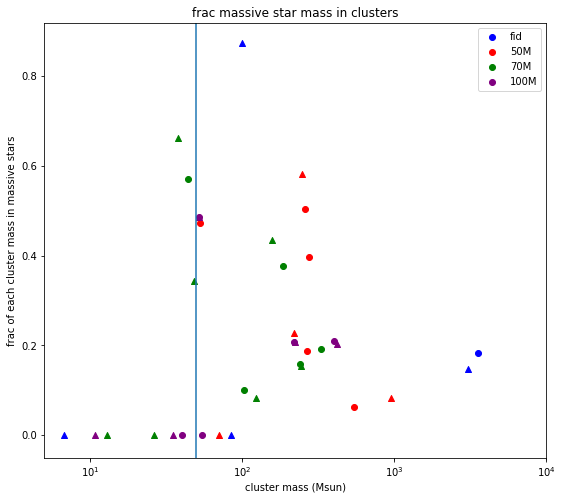

In [291]:
plt.figure(figsize=(9,8))
plt.scatter(Lv_2tff_mass, Lv_2tff_mass_perc_ms, c='b', label='fid')
plt.scatter(Lv_20gas_mass, Lv_20gas_mass_perc_ms, c='b', marker='^')

plt.scatter(L50_2tff_mass, L50_2tff_mass_perc_ms, c='r', label='50M')
plt.scatter(L50_20gas_mass, L50_20gas_mass_perc_ms, c='r', marker='^')

plt.scatter(L70_2tff_mass, L70_2tff_mass_perc_ms, c='g', label='70M')
plt.scatter(L70_20gas_mass, L70_20gas_mass_perc_ms, c='g', marker='^')

plt.scatter(L100_2tff_mass, L100_2tff_mass_perc_ms, c='purple', label='100M')
plt.scatter(L100_20gas_mass, L100_20gas_mass_perc_ms, c='purple', marker='^')
plt.xscale('symlog')
plt.title('frac massive star mass in clusters')
plt.xlabel('cluster mass (Msun)')
plt.ylabel('frac of each cluster mass in massive stars')
plt.xlim(5,10000)
plt.axvline(50)
plt.legend()
plt.show()

5
[336 265 207  86  41  18   3   0   0   0]
[0.11661114255759157, 0.24776512615034799, 0.5264296051809968, 1.1185114447577835, 2.3765149979055651, 5.0494105909601465, 10.728544670902874, 22.795070569547772, 48.432966279193749, 102.90611803304704] [340.21412873428142, 271.37029532633426, 213.45673329469753, 80.134529876259123, 30.083580777110026, 11.293781017626312, 4.2398373590934488, 1.5916919943381933, 0.59754259191253611, 0.22432552932328612]
[ 0.9876133   0.97652545  0.96975156  1.07319529  1.36286968  1.5937975
  0.70757431  0.          0.          0.        ]
[622 463 381 160  72  23   7   0   0   0]


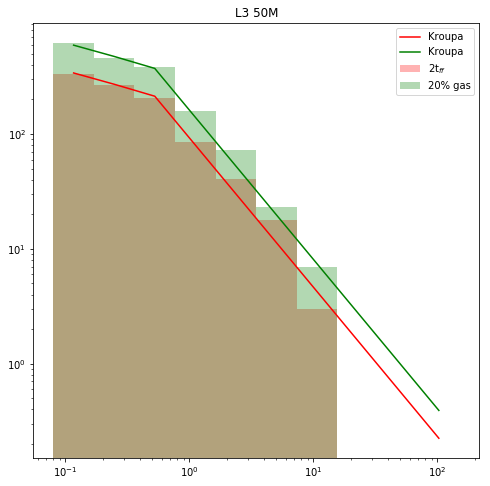

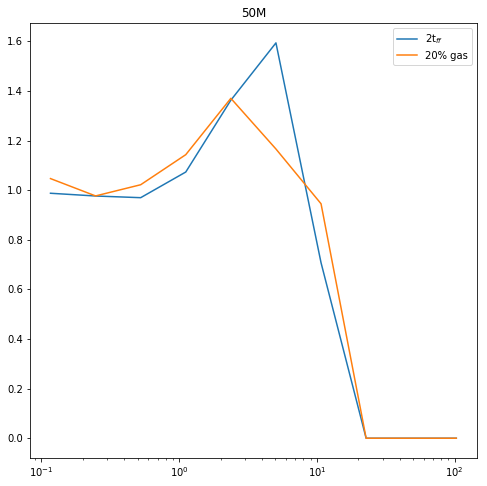

In [177]:
#print L50_20gas_dbscan.groups[0].mass.value_in(u.MSun)
#print L50_2tff_dbscan.groups[0].mass.value_in(u.MSun)
print len(L50_2tff_dbscan.groups)
x0, y0, bins0, counts0= normalize_kroupa(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun))
print counts0
print x0, y0
print counts0 / y0
plt.figure(figsize=(8,8))
plt.plot(x0, y0, label='Kroupa',color='r')
plt.xscale('log')
plt.yscale('log')
plt.hist(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun),bins=bins0,alpha=0.3,color='r',label='2t$_{ff}$')
#plt.ylim(0.11, 8e2)

plt.legend()


x1, y1, bins1, counts1= normalize_kroupa(L50_20gas_dbscan.groups[0].mass.value_in(u.MSun))
print counts1

plt.plot(x1, y1, label='Kroupa',color='g')
plt.xscale('log')
plt.yscale('log')
plt.hist(L50_20gas_dbscan.groups[0].mass.value_in(u.MSun),bins=bins1,alpha=0.3,color='g',label='20% gas')
#plt.ylim(0.11, 8e2)
plt.title("L3 50M")
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='2t$_{ff}$')
plt.plot(x1, counts1 / y1, label='20% gas')
plt.xscale('log')
plt.title('50M')
plt.legend()
plt.show()

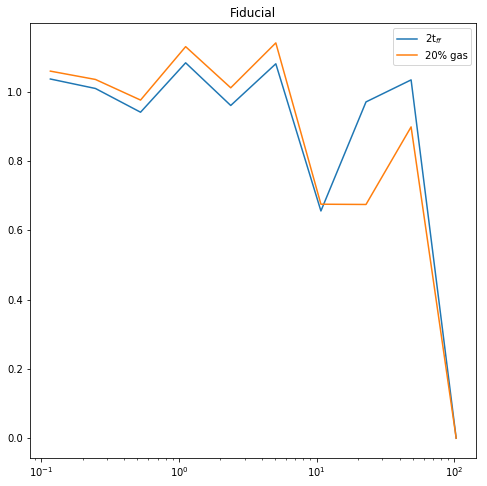

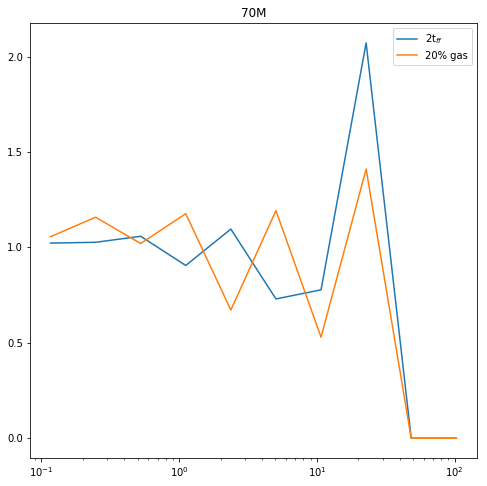

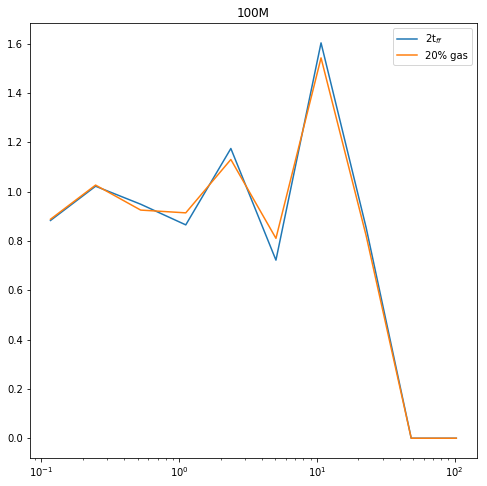

In [181]:
x0, y0, bins0, counts0= normalize_kroupa(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(Lv_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='2t$_{ff}$')
plt.plot(x1, counts1 / y1, label='20% gas')
plt.xscale('log')
plt.title('Fiducial')
plt.legend()
plt.show()

x0, y0, bins0, counts0= normalize_kroupa(L70_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(L70_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='2t$_{ff}$')
plt.plot(x1, counts1 / y1, label='20% gas')
plt.xscale('log')
plt.title('70M')
plt.legend()
plt.show()

x0, y0, bins0, counts0= normalize_kroupa(L100_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(L100_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='2t$_{ff}$')
plt.plot(x1, counts1 / y1, label='20% gas')
plt.xscale('log')
plt.title('100M')
plt.legend()
plt.show()

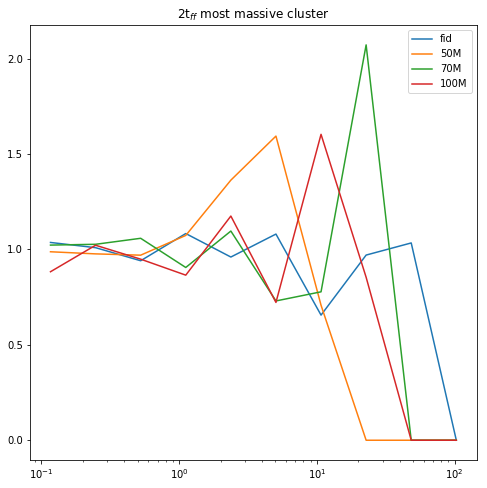

[211 169 137  44  20   5   2   2   0   0]


In [185]:
x0, y0, bins0, counts0= normalize_kroupa(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x2, y2, bins2, counts2= normalize_kroupa(L70_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x3, y3, bins3, counts3= normalize_kroupa(L100_2tff_dbscan.groups[0].mass.value_in(u.MSun))
#x1, y1, bins1, counts1= normalize_kroupa(L70_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='fid')
plt.plot(x1, counts1 / y1, label='50M')
plt.plot(x2, counts2 / y2, label='70M')
plt.plot(x3, counts3 / y3, label='100M')
plt.title('2t$_{ff}$ most massive cluster')
plt.xscale('log')
plt.legend()
plt.show()
print counts2

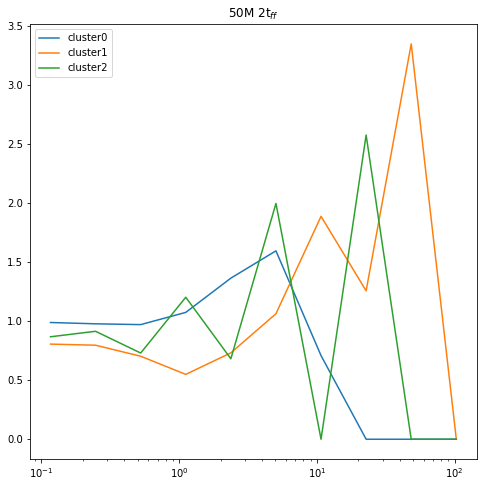

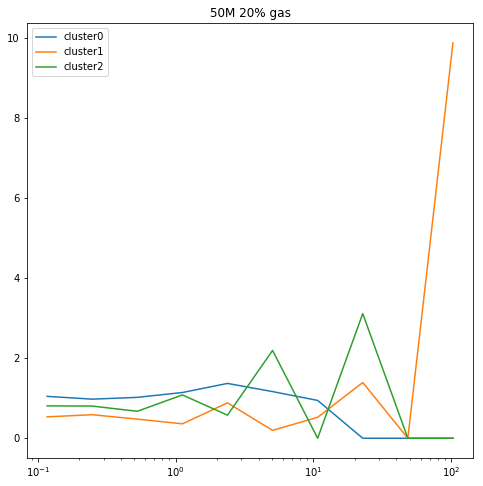

In [170]:
x0, y0, bins0, counts0= normalize_kroupa(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(L50_2tff_dbscan.groups[1].mass.value_in(u.MSun))
x2, y2, bins2, counts2= normalize_kroupa(L50_2tff_dbscan.groups[2].mass.value_in(u.MSun))
x3, y3, bins3, counts3= normalize_kroupa(L50_2tff_dbscan.groups[3].mass.value_in(u.MSun))
#x1, y1, bins1, counts1= normalize_kroupa(L70_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='cluster0')
plt.plot(x1, counts1 / y1, label='cluster1')
plt.plot(x2, counts2 / y2, label='cluster2')
#plt.plot(x3, counts3 / y3, label='20% gas')
plt.title('50M 2t$_{ff}$')
plt.xscale('log')
plt.legend()
plt.show()

x0, y0, bins0, counts0= normalize_kroupa(L50_20gas_dbscan.groups[0].mass.value_in(u.MSun))
x1, y1, bins1, counts1= normalize_kroupa(L50_20gas_dbscan.groups[1].mass.value_in(u.MSun))
x2, y2, bins2, counts2= normalize_kroupa(L50_20gas_dbscan.groups[2].mass.value_in(u.MSun))
x3, y3, bins3, counts3= normalize_kroupa(L50_20gas_dbscan.groups[3].mass.value_in(u.MSun))
#x1, y1, bins1, counts1= normalize_kroupa(L70_20gas_dbscan.groups[0].mass.value_in(u.MSun))
plt.figure(figsize=(8,8))
plt.plot(x0, counts0 / y0, label='cluster0')
plt.plot(x1, counts1 / y1, label='cluster1')
plt.plot(x2, counts2 / y2, label='cluster2')
#plt.plot(x3, counts3 / y3, label='20% gas')
plt.title('50M 20% gas')
plt.xscale('log')
plt.legend()
plt.show()

# Kernel Density Estimation on cluster data

66.9719333987
1.82589283667
[  0.07005847   0.07251664   0.07506106   0.07769477   0.08042088
   0.08324264   0.08616342   0.08918667   0.092316     0.09555514
   0.09890792   0.10237835   0.10597055   0.10968879   0.11353749
   0.11752123   0.12164475   0.12591295   0.13033092   0.1349039
   0.13963734   0.14453685   0.14960829   0.15485766   0.16029122
   0.16591543   0.17173698   0.1777628    0.18400004   0.19045614
   0.19713876   0.20405586   0.21121566   0.21862668   0.22629773
   0.23423794   0.24245676   0.25096395   0.25976964   0.26888429
   0.27831876   0.28808426   0.2981924    0.30865521   0.31948514
   0.33069506   0.34229831   0.35430869   0.36674048   0.37960847
   0.39292797   0.40671481   0.4209854    0.43575671   0.4510463
   0.46687237   0.48325373   0.50020988   0.51776097   0.53592789
   0.55473224   0.57419638   0.59434347   0.61519747   0.63678319
   0.65912629   0.68225336   0.70619189   0.73097037   0.75661826
   0.78316608   0.81064538   0.83908887   0.868530

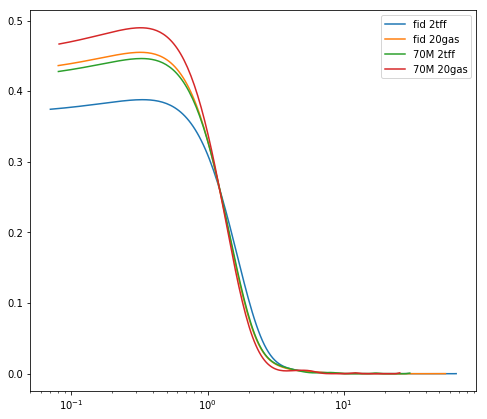

In [359]:
from scipy import stats

Lv_2tff_stars_masses = np.array(sorted(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))[1:])
Lv_20gas_stars_masses = Lv_20gas_dbscan.groups[0].mass.value_in(u.MSun)

L70_2tff_stars_masses = L70_2tff_dbscan.groups[0].mass.value_in(u.MSun)
L70_20gas_stars_masses = L70_20gas_dbscan.groups[0].mass.value_in(u.MSun)

mass_kernel = stats.gaussian_kde(Lv_2tff_stars_masses,bw_method=0.5)
ind = np.logspace(np.log10(Lv_2tff_stars_masses.min()), np.log10(Lv_2tff_stars_masses.max()), 200)
print Lv_2tff_stars_masses.max()
print np.log10(Lv_2tff_stars_masses.max())
print ind
mass_kernel1 = stats.gaussian_kde(Lv_20gas_stars_masses,bw_method=0.5)
ind1 = np.logspace(np.log10(Lv_20gas_stars_masses.min()), np.log10(Lv_20gas_stars_masses.max()), 200)

mass_kernel2 = stats.gaussian_kde(L70_2tff_stars_masses,bw_method=0.5)
ind2 = np.logspace(np.log10(L70_2tff_stars_masses.min()), np.log10(L70_2tff_stars_masses.max()), 200)
mass_kernel3 = stats.gaussian_kde(L70_20gas_stars_masses,bw_method=0.5)
ind3 = np.logspace(np.log10(L70_20gas_stars_masses.min()), np.log10(L70_20gas_stars_masses.max()), 200)

plt.figure(figsize=(8,7))
plt.semilogx(ind, mass_kernel.evaluate(ind), label='fid 2tff')
plt.semilogx(ind1, mass_kernel1.evaluate(ind1), label='fid 20gas')
plt.semilogx(ind2, mass_kernel2.evaluate(ind2), label='70M 2tff')
plt.semilogx(ind3, mass_kernel3.evaluate(ind3), label='70M 20gas')
plt.legend()
plt.show()

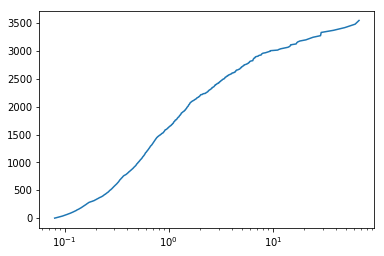

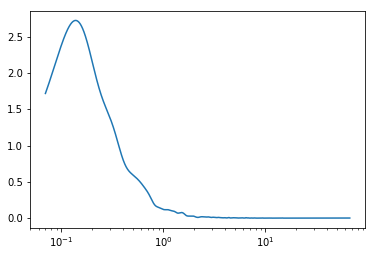

In [357]:
a = np.array([1,2,3,4,5])
L3_2tff_cumsum = np.cumsum(sorted(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))[2:])
plt.semilogx(sorted(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))[2:], L3_2tff_cumsum)
plt.show()

L3_cumsum_kernel = stats.gaussian_kde(Lv_2tff_stars_masses,bw_method=0.03)
ind = np.logspace(np.log10(Lv_2tff_stars_masses.min()), np.log10(Lv_2tff_stars_masses.max()), 2000)
plt.semilogx(ind, L3_cumsum_kernel.evaluate(ind), label='fid 2tff')

[  8.00000000e-02   1.69976982e-01   3.61152181e-01   7.67344472e-01
   1.63038622e+00   3.46410162e+00   7.36021923e+00   1.56383482e+01
   3.32269903e+01   7.05977942e+01   1.50000000e+02]


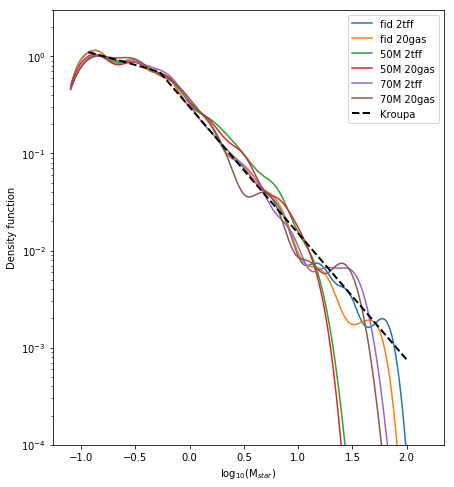

In [438]:
Lv_2tff_stars_log_masses = np.array(np.log10(sorted(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun))[2:]))
ind = np.linspace(Lv_2tff_stars_log_masses.min(), Lv_2tff_stars_log_masses.max(), 200)
mass_kernel = stats.gaussian_kde(Lv_2tff_stars_log_masses,bw_method='silverman')
x0, y0, bins0, counts0 = normalize_kroupa(Lv_2tff_dbscan.groups[0].mass.value_in(u.MSun)[2:])
print bins0
standard_ind = np.linspace(np.log10(np.array(bins0).min()), np.log10(np.array(bins0).max()), 200)

Lv_20gas_stars_log_masses = np.array(np.log10(sorted(Lv_20gas_dbscan.groups[0].mass.value_in(u.MSun))[1:]))
mass_kernel1 = stats.gaussian_kde(Lv_20gas_stars_log_masses,bw_method='silverman')
ind1 = np.linspace(Lv_20gas_stars_log_masses.min(), Lv_20gas_stars_log_masses.max(), 200)

L50_20gas_stars_log_masses = np.array(np.log10(sorted(L50_20gas_dbscan.groups[0].mass.value_in(u.MSun))[1:]))
mass_kernel2 = stats.gaussian_kde(L50_20gas_stars_log_masses,bw_method='silverman')
ind2 = np.linspace(L50_20gas_stars_log_masses.min(), L50_20gas_stars_log_masses.max(), 200)

L50_2tff_stars_log_masses = np.array(np.log10(sorted(L50_2tff_dbscan.groups[0].mass.value_in(u.MSun))[1:]))
mass_kernel3 = stats.gaussian_kde(L50_2tff_stars_log_masses,bw_method='silverman')
ind3 = np.linspace(L50_2tff_stars_log_masses.min(), L50_2tff_stars_log_masses.max(), 200)

L70_2tff_stars_log_masses = np.array(np.log10(sorted(L70_2tff_dbscan.groups[0].mass.value_in(u.MSun))[1:]))
mass_kernel4 = stats.gaussian_kde(L70_2tff_stars_log_masses,bw_method='silverman')
ind4 = np.linspace(L70_2tff_stars_log_masses.min(), L70_2tff_stars_log_masses.max(), 200)

L70_20gas_stars_log_masses = np.array(np.log10(sorted(L70_20gas_dbscan.groups[0].mass.value_in(u.MSun))[1:]))
mass_kernel5 = stats.gaussian_kde(L70_20gas_stars_log_masses,bw_method='silverman')
ind5 = np.linspace(L70_20gas_stars_log_masses.min(), L70_20gas_stars_log_masses.max(), 200)

plt.figure(figsize=(7,8))
plt.plot(standard_ind, mass_kernel.evaluate(standard_ind), label='fid 2tff') #ind
plt.plot(standard_ind, mass_kernel1.evaluate(standard_ind), label='fid 20gas') #ind1
plt.plot(standard_ind, mass_kernel3.evaluate(standard_ind), label='50M 2tff') #ind3
plt.plot(standard_ind, mass_kernel2.evaluate(standard_ind), label='50M 20gas') #ind2
plt.plot(standard_ind, mass_kernel4.evaluate(standard_ind), label='70M 2tff') #ind4
plt.plot(standard_ind, mass_kernel5.evaluate(standard_ind), label='70M 20gas') #ind5
plt.semilogy(np.log10(x0),np.array(y0)*5e-4, lw=2, ls='--', c='k', label='Kroupa')
plt.ylim(1e-4, 3e0)
plt.legend()
plt.xlabel('log$_{10}$(M$_{star}$)')
plt.ylabel('Density function')
plt.show()